In [1]:
#Importing required libraries

import pandas as pd
import statistics as stats
import plotly.graph_objs as go
import pdfkit
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
#Loading data from the form via excel

df = pd.read_csv("OCDrawdata.csv")
headers = ["time", "age", "agree", "consent", "OCDQ1", "OCDQ2", "OCDQ3", "OCDQ4","OCDQ5","OCDQ6", "OCDQ7","OCDQ8","OCDQ9","OCDQ10","PSQI1","PSQI2","PSQI3","PSQIhoursinbed","PSQI4","PSQI5a","PSQI5b","PSQI5c","PSQI5d","PSQI5e","PSQI5f","PSQI5g","PSQI5h","PSQI5i","PSQI5other","PSQI6","PSQI7","PSQI8","PSQI9","PSQI10","PSQI11a","PSQI11b","PSQI11c","PSQI11d","PANAS1","PANAS2","PANAS3","PANAS4","PANAS5","PANAS6","PANAS7","PANAS8","PANAS9","PANAS10","PANAS11","PANAS12","PANAS13","PANAS14","PANAS15","PANAS16","PANAS17","PANAS18","PANAS19","PANAS20","MEQ1","MEQ2","MEQ3","MEQ4","MEQ5","MEQ6","MEQ7","MEQ8","MEQ9","MEQ10","MEQ11","MEQ12","MEQ13","MEQ14","MEQ15","MEQ16","MEQ17","MEQ18","MEQ19"]
df.columns = headers

#Dropping PSQI Question 10 and 11
df.drop(columns = ["PSQI10","PSQI11a","PSQI11b","PSQI11c","PSQI11d"],axis=1, inplace= True)

In [3]:
#Mapping the responses with the score indicators using dictionary

values = {
    #YBOCS-OCD
    "None":0, "0-1 hrs/day":1, "1-3 hrs/day": 2, "3-8 hrs/day" :3, "More than 8 hrs/day": 4,
    "Mild":1, "Definite but manageable" : 2, "Significant interference": 3, "Severe": 4,
    "Little":1 , "Moderate but manageable" : 2, "Severe": 3, "Nearly constant disabling":4,
    "Always Try": 0, "Try a lot of times":1, "Try some of the time" : 2, "Rarely try": 3, "Never try" : 4,
    "Complete extent": 0, "Much extent": 1, "Some extent" : 2, "Little extent": 3, "No extent": 4,
    
    #PSQI Question 2
    "Less 15 minutes": 0, "16 to 30 minutes": 1, "31 to 60 minutes" :2, "Greater than 60 minutes" :3,
      
    #PSQI Question 5, 6 & 7
    "Not during the past month": 0, "< once a week": 1, "1 or 2 times a week": 2, "3 or more times a week" : 3, 
    
    #PSQI Question 8
    "No problem at all": 0,"Only a very slight problem": 1,"Somewhat of a problem": 2,"A very big problem": 3,   
    #PSQI Question 9 
    "Very good": 0, "Fairly good": 1, "Fairly bad": 2, "Very bad": 3,

    #PANAS
    "Very slightly or not at all": 1, "A little": 2, "Moderately": 3, "Quite a bit": 4, "Extremely": 5,
    
    #MEQ Question 1
    "5:00 AM–6:30 AM": 5, "6:30 AM–7:45 AM": 4, "7:45 AM–9:45 AM" : 3, "9:45 AM–11:00 AM" : 2, "11:00 AM–12 noon" : 1,
    #MEQ Question 2
    "8:00 PM–9:00 PM": 5, "9:00 PM–10:15 PM": 4, "10:15 PM–12:30 AM" : 3, "12:30 AM–1:45 AM" : 2, "1:45 AM–3:00 AM" : 1,
    #MEQ Question 3
    "Not at all": 4, "Slightly" : 3, "Somewhat" : 2, "Very much" : 1, 
    
    #MEQ Question 4
    "Very difficult" : 1, "Somewhat difficult" : 2, "Fairly easy" : 3, "Very easy" : 4, 
    
    #MEQ Question 5
    "Not at all alert" : 1, "Slightly alert" : 2, "Fairly alert" : 3, "Very alert" : 4,
    
    #MEQ Question 6
    "Not at all hungry" : 1, "Slightly hungry" :2 , "Fairly hungry" : 3, "Very hungry" : 4, 
    
    #MEQ Question 7 
    "Very tired": 1, "Pretty tired" : 2, "Fairly refreshed" : 3, "Very refreshed" : 4, 
    
     #MEQ Question 8
    "Seldom or never later" : 4 , "Less than 1 hour later" : 3, "1-2 hours later" : 2, "More than 2 hours later" : 1,
    
    #MEQ Question 9
    "Would be in a good form" :4, "Would be in a reasonable form" : 3, "Would find it hard" : 2, "Would find it very hard" : 1,
    
    #MEQ Question 10
    "10:15 PM–12:45 AM" :3, "12:45 AM–2:00 AM" : 2, "2:00 AM–3:00 AM" : 1,
    
    #MEQ Question 11
    "8 AM – 10 AM" :6, "11 AM – 1 PM" :4, "3 PM – 5 PM" : 2, "7 PM – 9 PM" : 0,
    
    #MEQ Question 12
    "Not at all tired" : 0, "A little tired" : 2, "Fairly tired" :3, "Highly tired" :5,
    
    #MEQ Question 13
    "Will wake up at usual time, but will not fall back asleep" :4, "Will wake up at usual time and will doze thereafter" : 3, "Will wake up at usual time, but will fall asleep again" : 2, "Will not wake up until later than usual" : 1,
    
    #MEQ Question 14
    "Would not go to bed until the watch is over" : 1, "Would take a nap before and sleep after" : 2, "Would take a good sleep before and nap after" : 3, "Would sleep only before the watch" : 4,
    
    #MEQ Question 15
    "8 AM–10 AM" : 4, "11 AM–1 PM" :3, "3 PM–5 PM" :2, "7 PM–9 PM" :1,
    
    #MEQ Question 16
    "Would be in good form" : 1, "Would be in reasonable form" : 2, "Would find it difficult" :3, "Would find it very difficult" : 4,
    
    #MEQ Question 17
    "5 hours starting between 4 AM–8 AM" : 5, "5 hours starting between 8 AM–9 AM" : 4, "5 hours starting between 9 AM–2 PM" : 3, "5 hours starting between 2 PM–5 PM" : 2, "5 hours starting between 5 PM–4 AM" : 1,
    
    #MEQ Question 18
    "5 AM–8 AM": 5, "8 AM–10 AM" : 4, "10 AM–5 PM" : 3, "5 PM–10 PM" :2, "10 PM–5 AM" :1,
    
    #MEQ Question 19
    "Definitely a morning type":6, "Rather more a morning type than an evening type" : 4, "Rather more an evening type than a morning type" : 2, "Definitely an evening type" : 1
}

In [ ]:
#Data Cleaning

#PSQI Question 1, 3
df['PSQI1'] = df['PSQI1'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
df['PSQI3'] = df['PSQI3'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)


In [4]:
#Data mapping

#OCD Question 
df['OCDQ1'] = df['OCDQ1'].replace(values)
df['OCDQ2'] = df['OCDQ2'].replace(values)
df['OCDQ3'] = df['OCDQ3'].replace(values)
df['OCDQ4'] = df['OCDQ4'].replace(values)
df['OCDQ5'] = df['OCDQ5'].replace(values)
df['OCDQ6'] = df['OCDQ6'].replace(values)
df['OCDQ7'] = df['OCDQ7'].replace(values)
df['OCDQ8'] = df['OCDQ8'].replace(values)
df['OCDQ9'] = df['OCDQ9'].replace(values)
df['OCDQ10'] = df['OCDQ10'].replace(values)

#PSQI Question 5a till 5other
df['PSQI5a'] = df['PSQI5a'].replace(values)
df['PSQI5b'] = df['PSQI5b'].replace(values)
df['PSQI5c'] = df['PSQI5c'].replace(values)
df['PSQI5d'] = df['PSQI5d'].replace(values)
df['PSQI5e'] = df['PSQI5e'].replace(values)
df['PSQI5f'] = df['PSQI5f'].replace(values)
df['PSQI5g'] = df['PSQI5g'].replace(values)
df['PSQI5h'] = df['PSQI5h'].replace(values)
df['PSQI5i'] = df['PSQI5i'].replace(values)
df['PSQI5other'] = df['PSQI5other'].replace(values, regex= True)

#PSQI Question 2, 6 and 7
df['PSQI2'] = df['PSQI2'].replace(values)
df['PSQI6'] = df['PSQI6'].replace(values)
df['PSQI7'] = df['PSQI7'].replace(values)

#PSQI Question 8
df['PSQI8'] = df['PSQI8'].replace(values)

#PSQI Question 9
df['PSQI9'] = df['PSQI9'].replace(values)

#PANAS Question 1 to 20
df['PANAS1'] = df['PANAS1'].replace(values)
df['PANAS2'] = df['PANAS2'].replace(values)
df['PANAS3'] = df['PANAS3'].replace(values)
df['PANAS4'] = df['PANAS4'].replace(values)
df['PANAS5'] = df['PANAS5'].replace(values)
df['PANAS6'] = df['PANAS6'].replace(values)
df['PANAS7'] = df['PANAS7'].replace(values)
df['PANAS8'] = df['PANAS8'].replace(values)
df['PANAS9'] = df['PANAS9'].replace(values)
df['PANAS10'] = df['PANAS10'].replace(values)
df['PANAS11'] = df['PANAS11'].replace(values)
df['PANAS12'] = df['PANAS12'].replace(values)
df['PANAS13'] = df['PANAS13'].replace(values)
df['PANAS14'] = df['PANAS14'].replace(values)
df['PANAS15'] = df['PANAS15'].replace(values)
df['PANAS16'] = df['PANAS16'].replace(values)
df['PANAS17'] = df['PANAS17'].replace(values)
df['PANAS18'] = df['PANAS18'].replace(values)
df['PANAS19'] = df['PANAS19'].replace(values)
df['PANAS20'] = df['PANAS20'].replace(values)

#MEQ Question 1
df['MEQ1'] = df['MEQ1'].replace(values)
df['MEQ2'] = df['MEQ2'].replace(values)
df['MEQ3'] = df['MEQ3'].replace(values)
df['MEQ4'] = df['MEQ4'].replace(values)
df['MEQ5'] = df['MEQ5'].replace(values)
df['MEQ6'] = df['MEQ6'].replace(values)
df['MEQ7'] = df['MEQ7'].replace(values)
df['MEQ8'] = df['MEQ8'].replace(values)
df['MEQ9'] = df['MEQ9'].replace(values)
df['MEQ10'] = df['MEQ10'].replace(values)
df['MEQ11'] = df['MEQ11'].replace(values)
df['MEQ12'] = df['MEQ12'].replace(values)
df['MEQ13'] = df['MEQ13'].replace(values)
df['MEQ14'] = df['MEQ14'].replace(values)
df['MEQ15'] = df['MEQ15'].replace(values)
df['MEQ16'] = df['MEQ16'].replace(values)
df['MEQ17'] = df['MEQ17'].replace(values)
df['MEQ18'] = df['MEQ18'].replace(values)
df['MEQ19'] = df['MEQ19'].replace(values)


#Import the mapped data to csv file and read from it for data analysis.
df.to_csv('data_mapped.csv', index=False) 
df_1 = pd.read_csv('data_mapped.csv')

In [5]:
# PSQI Prediction

############################### Element 1 - Sleep Latency - Question 2 and 5A ##############################
df_1['PSQIsub'] = df['PSQI5a'] + df['PSQI2']

def sleep_latency_psqi5a(row1):
    if row1['PSQIsub']==0:
        return 0
    if row1['PSQIsub'] in range(1,3):
        return 1
    if row1['PSQIsub'] in range(3,5):
        return 2
    if row1['PSQIsub'] in range(5,7):
        return 3
df_1['sleep_latency'] = df_1.apply(sleep_latency_psqi5a, axis=1).astype(int)

def sleep_latency_descr(row2):
    if row2['sleep_latency'] in range (0,2):
        return 'Good job! You have good sleep latency. Sleep latency is the time taken by an individual to fall asleep as soon as the lights turn off in the room.'
    elif row2['sleep_latency'] in range (2,4):
        return "You are doing a great job at maintaining your sleep hygiene. You have a issue with sleep latency. Sleep latency is the time taken by an individual to fall asleep as soon as the lights turn off in the room. There are certain recommendations for you to improve your sleep hygiene: 1. If you don't get sleep within 20 minutes of getting in bed, get out of bed. 2. Don't try to lie in bed awake. 3. Do something relaxing, passive and avoid using technology in bed. You can find more recommendations on NHS website: https://www.sleepstation.org.uk/articles/sleep-science/sleep-restriction-therapy/"
    
df_1['Sleep Latency'] = df_1.apply(sleep_latency_descr, axis=1).astype(str)  

############################## Element 2 - Sleep disturbance - Question 5b to 5j #############################

def sleep_disturbance_comp(row3):
    sum = row3['PSQI5b'] +row3['PSQI5c']+row3['PSQI5d']+row3['PSQI5e']+row3['PSQI5f']+row3['PSQI5g']+row3['PSQI5h']+row3['PSQI5i']+row3['PSQI5other']
    return sum 
df_1['PSQI5bs'] = df_1.apply(sleep_disturbance_comp, axis=1).astype(int)  

def sleep_disturbance(row4):
    if row4['PSQI5bs'] == 0:
        return 0
    elif row4['PSQI5bs'] in range (1,10):
        return 1
    elif row4['PSQI5bs'] in range (10,19):
        return 2
    elif row4['PSQI5bs'] > 18:
        return 3
df_1['sleep_disturbance'] = df_1.apply(sleep_disturbance, axis=1).astype(int)  

def sleep_disturbance_descr(row5):
    if row5['sleep_disturbance'] == 0:
        return 'Good job! You have lower levels of sleep disturbances'
    elif row5['sleep_disturbance'] in range (1,4):
        return "You are doing a great job at maintaining your sleep hygiene. You have a issue with sleep disturbances. There are recommendations for you to improve your sleep hygiene: 1. Be consistent in your sleep schedule. 2. Make sure the bedroom is dark, quiet, cozy and at a comfortable temperature. 3. Avoid heavy meals, caffiene, alcohol before bed time. You can find more info on NHS website:  https://www.nhs.uk/every-mind-matters/mental-health-issues/sleep/"
    
df_1['Sleep Disturbance'] = df_1.apply(sleep_disturbance_descr, axis=1).astype(str)  

############################### Element 3 - Subjective sleep quality - Question 9 ############################

def subjective_sleep_quality(row6):
    if row6['PSQI9'] == 0:
        return 'Good job! You have a very good sleep quality'
    elif row6['PSQI9'] == 1:
        return 'Good job! You have a fairly good sleep quality. There are recommendations that you can improve upon'
    elif row6['PSQI9'] in range (2, 4):
        return 'You have fairly bad sleep quality. There are recommendations that you can improve upon.'
    
df_1['subjective_sleep_quality_descr'] = df_1.apply(subjective_sleep_quality, axis=1).astype(str)  

############################### Element 4 - Sleep duration - Question 4 ##############################

def sleep_duration(row12):
    if row12['PSQI4'] ==  "7 or more than 7 hours":
        return 0
    elif row12['PSQI4'] == "Between 6 and 7 hours":
        return 1
    elif row12['PSQI4'] == "Between 5 and 6 hours":
        return 2
    elif row12['PSQI4'] == "Less than 5 hours":
        return 3
    
df_1['PSQI4s'] = df_1.apply(sleep_duration, axis=1).astype(int)  

def sleep_duration_d(row7):
    if row7['PSQI4s'] == 0:
        return 'Good job! You have a very good sleep duration'
    elif row7['PSQI4s'] in range (1,3):
        return 'Your sleep duration is less than the recommended hours.                                  According to the CDC, adults need 7 to 9 hours of sleep every night for a restful sleep.https://www.sleepstation.org.uk/articles/sleep-science/sleep-need/'
    elif row7['PSQI4s'] == 3:
        return 'Your sleep duration is very less than the recommended hours. According to the CDC, adults need 7 to 9 hours of sleep every night for a restful sleep. https://www.sleepstation.org.uk/articles/sleep-science/sleep-need/ '
    
df_1['Sleep Duration'] = df_1.apply(sleep_duration_d, axis=1).astype(str)  

############################ Element 5 - Sleep efficiency — Questions 1, 3, and 4 ############################

def sleep_duration_average(row12):
    if row12['PSQI4'] ==  "7 or more than 7 hours":
        data = [7, 8 , 9 ,10]
        return stats.mean(data)
    elif row12['PSQI4'] == "Between 6 and 7 hours":
        data = [6, 7]
        return stats.mean(data)
    elif row12['PSQI4'] == "Between 5 and 6 hours":
        data = [5, 6]
        return stats.mean(data)
    elif row12['PSQI4'] == "Less than 5 hours":
        data = [0,1,2,3,4]
        return stats.mean(data)
    
df_1['PSQI4avg'] = df_1.apply(sleep_duration_average, axis=1).astype(int) 

def sleep_efficiency_calc(row8):
    efficiency = (row8['PSQI4avg'] / row8['PSQIhoursinbed']) * 100
    return efficiency
    
df_1['sleep_efficiency'] = df_1.apply(sleep_efficiency_calc, axis=1).astype(int) 

def sleep_efficiency_percent(col):
    if col['sleep_efficiency'] >= 85:
        return 0
    elif col['sleep_efficiency'] in range (75,85):
        return 1
    elif col['sleep_efficiency'] in range (65,75):
        return 2
    elif col['sleep_efficiency'] < 65:
        return 3
df_1['sleep_efficiency_percent'] = df_1.apply(sleep_efficiency_percent, axis=1).astype(int) 

def sleep_efficiency_descr(col):
    if col['sleep_efficiency_percent'] == 0:
        return 'Good job! You have good sleep efficiency'
    elif col['sleep_efficiency_percent'] in range (1,4):
        return 'A sleep eficiency is the time spent in bed asleep. You need to take care of sleep efficiency. There are recommendations that you can improve upon: 1. Establish your bedroom and bed as a sleep sanctuary, which means use the bed only for sleeping/sex. Avoid bringing work, entertainment (technology or watching tv) or study in the bed. 2. Keep an alarm for an obvious measure. 3. Avoid midday naps. You can find more recommendations on this link: https://www.verywellhealth.com/sleep-efficiency-3014912' 

df_1['Sleep Efficiency'] = df_1.apply(sleep_efficiency_descr, axis=1).astype(str) 

############################# Element 6 - Use of sleep medication — Question 6 ##############################
def sleep_medication(row9):
    if row9['PSQI6'] == 0:
        return 'Good job! You have good sleep hygiene'
    elif row9['PSQI6'] in range (1,3):
        return 'You need to take care of sleep hygiene. There are recommendations that you can improve upon.'
    elif row9['PSQI6'] == 3:
        return 'Your sleep hygiene is worse. You need to take care of sleep hygiene. There are recommendations that you can improve upon.'

df_1['sleep_medication_descr'] = df_1.apply(sleep_medication, axis=1) .astype(str) 

############################# Element 7 - Daytime dysfunction — Questions 7 and 8 ############################

df_1['PSQIds'] = df['PSQI7'] + df['PSQI8']

def sleep_dysfunction(row10):
    if row10['PSQIds'] == 0:
        return 0
    elif row10['PSQIds'] in range (1,3):
        return 1
    elif row10['PSQIds'] in range (3,5):
        return 2
    elif row10['PSQIds'] in range (5,7):
        return 3
df_1['sleep_dysfunction'] = df_1.apply(sleep_dysfunction, axis=1).astype(int) 

def sleep_dysfunction_descr(row11):
    if row11['sleep_dysfunction'] == 0:
        return 'Good job! You have good sleep hygiene'
    elif row11['sleep_dysfunction'] in range (1,4):
        return 'Daytime Sleep dysfunction is when your insufficient sleep cycle affects your day to day activities. You are likely to be affected by daytime sleep dysfunctions and need to take care of sleep hygiene. There are recommendations that you can improve upon. https://www.webmd.com/sleep-disorders/features/daytime-sleepiness-tips.'

df_1['Sleep Dysfunction'] = df_1.apply(sleep_dysfunction_descr, axis=1).astype(str)

In [6]:
#PSQI Score 
def Global_PSQI(col2):
    Global_PSQI_value = col2['sleep_latency'] + col2['sleep_disturbance'] + col2['PSQI9'] + col2['PSQI4s'] + col2['sleep_efficiency_percent'] + col2['PSQI6'] + col2['sleep_dysfunction'] 
    return Global_PSQI_value

df_1['Global_PSQI'] = df_1.apply(Global_PSQI, axis=1).astype(int)

def Global_PSQI_interpret(col):
    if col['Global_PSQI'] <= 5:
        return 'Good job! You have good sleep quality overall'
    elif col['Global_PSQI'] in range (5,21):
        return 'You need to take care of sleep quality. Sleep quality is the measure of sleep latency, disturbances, efficiency, dysfunction. You need to make certain changes in your sleep hygiene. There are recommendations from CDC that you can improve upon. https://www.cdc.gov/sleep/about_sleep/sleep_hygiene.html'
    elif col['Global_PSQI'] >= 21:
        return 'Your overall sleep quality needs to be improved. Sleep quality is the measure of sleep latency, disturbances, efficiency, dysfunction. You need to make certain changes in your sleep hygiene. There are recommendations from CDC that you can improve upon. https://www.cdc.gov/sleep/about_sleep/sleep_hygiene.html'

df_1['Global PSQI'] = df_1.apply(Global_PSQI_interpret, axis=1).astype(str)


In [7]:
#OCD Score
def OCD_Score(col3):
    OCD_Score_value = col3['OCDQ1'] + col3['OCDQ2'] + col3['OCDQ3'] + col3['OCDQ4'] + col3['OCDQ5'] + col3['OCDQ6'] + col3['OCDQ7'] + col3['OCDQ8'] + col3['OCDQ9'] + col3['OCDQ10'] 
    return OCD_Score_value
df_1['OCD_Score_value'] = df_1.apply(OCD_Score, axis=1).astype(int)

def OCD_Score_interpret(col):
    if col['OCD_Score_value'] in range(8,16):
        return 'Likely to have a mild case of OCD'
    elif col['OCD_Score_value'] in range (16,23):
        return 'Likely to have a moderate case of OCD'
    elif col['OCD_Score_value'] in range (24,31):
        return 'Likely to have a severe case of OCD'
    elif col['OCD_Score_value'] in range (32,41):
        return 'Likely to have a extreme case of OCD'

df_1['OCD_Score_interpret'] = df_1.apply(OCD_Score_interpret, axis=1).astype(str)

In [8]:
#PANAS Score
# Higher the value of positive score higher levels of positive affect.
def PANAS_Score_positive(col4):
    PANAS_Score_positive_value = col4['PANAS1'] + col4['PANAS3'] + col4['PANAS5'] + col4['PANAS7'] + col4['PANAS9'] + col4['PANAS11'] + col4['PANAS13'] + col4['PANAS15'] + col4['PANAS17'] + col4['PANAS19'] 
    return PANAS_Score_positive_value
df_1['PANAS_Score_positive'] = df_1.apply(PANAS_Score_positive, axis=1).astype(int)

# Higher the value of negative score higher levels of negative affect.
def PANAS_Score_negative(col4):
    PANAS_Score_negative_value = col4['PANAS2'] + col4['PANAS4'] + col4['PANAS6'] + col4['PANAS8'] + col4['PANAS10'] + col4['PANAS12'] + col4['PANAS14'] + col4['PANAS16'] + col4['PANAS18'] + col4['PANAS20'] 
    return PANAS_Score_negative_value
df_1['PANAS_Score_negative'] = df_1.apply(PANAS_Score_negative, axis=1).astype(int)

In [9]:
#MEQ Score

def MEQ_score(col5):
    MEQ_score_value = col5['MEQ1'] + col5['MEQ2'] + col5['MEQ3'] + col5['MEQ4'] + col5['MEQ5'] + col5['MEQ6'] + col5['MEQ7'] + col5['MEQ8'] + col5['MEQ9'] + col5['MEQ10'] + col5['MEQ11'] + col5['MEQ12'] + col5['MEQ13'] + col5['MEQ14'] + col5['MEQ15'] + col5['MEQ16'] + col5['MEQ17'] + col5['MEQ18'] + col5['MEQ19']
    return MEQ_score_value
df_1['MEQ_score_value'] = df_1.apply(MEQ_score, axis=1).astype(int)

def MEQ_score_interpret(col):
    if col['MEQ_score_value'] in range(16,31):
        return 'Evening type'
    elif col['MEQ_score_value'] in range (31,42):
        return 'Moderately evening type'
    elif col['MEQ_score_value'] in range (42,59):
        return 'Evening and morning type.'
    elif col['MEQ_score_value'] in range (59,70):
        return 'Moderately morning type'
    elif col['MEQ_score_value'] in range (70, 87):
        return 'Morning type'
df_1['MEQscore'] = df_1.apply(MEQ_score_interpret, axis=1).astype(str)

#Importing data on the excel
df_1.style.set_properties(**{'text-align': 'middle'})
df_1.to_csv('data_pred.csv', index=False)

Code for the assessment for the study

In [ ]:
df_2 = pd.read_csv('data_pred.csv',skipinitialspace = True)
#Importing data to user demo
df_2.drop(columns = ["time", "age", "agree", "consent", "OCDQ1", "OCDQ2", "OCDQ3", "OCDQ4","OCDQ5","OCDQ6", "OCDQ7","OCDQ8","OCDQ9","OCDQ10","PSQI1","PSQI2","PSQI3","PSQIhoursinbed","PSQI4","PSQI5a","PSQI5b","PSQI5c","PSQI5d","PSQI5e","PSQI5f","PSQI5g","PSQI5h","PSQI5i","PSQI5other","PSQI6","PSQI7","PSQI8","PSQI9","PANAS1","PANAS2","PANAS3","PANAS4","PANAS5","PANAS6","PANAS7","PANAS8","PANAS9","PANAS10","PANAS11","PANAS12","PANAS13","PANAS14","PANAS15","PANAS16","PANAS17","PANAS18","PANAS19","PANAS20","MEQ1","MEQ2","MEQ3","MEQ4","MEQ5","MEQ6","MEQ7","MEQ8","MEQ9","MEQ10","MEQ11","MEQ12","MEQ13","MEQ14","MEQ15","MEQ16","MEQ17","MEQ18","MEQ19","PSQIsub", "sleep_latency","PSQI5bs", "sleep_disturbance","PSQI4s","PSQI4avg", "sleep_efficiency","sleep_efficiency_percent","PSQIds","sleep_dysfunction", "Global_PSQI","OCD_Score_value","PANAS_Score_positive", "PANAS_Score_negative", "MEQ_score_value", ],axis=1, inplace= True)

#exporting data from html to pdf
options = {
    'page-size': 'Potrait',
    'margin-top': '0.75in',
    'margin-right': '0.75in',
    'margin-bottom': '0.75in',
    'margin-left': '0.75in',
    'encoding': "UTF-9",
    'custom-header': [
        ('Accept-Encoding', 'gzip')
    ],
    'no-outline': None
}

f = open('data_user_demo.html','w')
a = df_2.to_html()
f.write(a)
f.close()
df2t = df_2.transpose()
df2t.insert(0, "Elements", ["Sleep latency","Sleep Disturbance","Sleep Duration","Sleep Efficiency", "Sleep Dysfunction", "Global PSQI", "MEQ"], True)
headers = ["Elements", "Description"]
df2t.columns = headers
df2t.to_html('data_user_demo.html', index=False) 
df2t.style.set_properties(**{'text-align': 'middle'})
df_user_demo = pd.read_html('data_user_demo.html')

pdfkit.from_file('data_user_demo.html', 'data_user_demo.pdf',verbose=True)

In [10]:
df = pd.read_csv('data_pred.csv',skipinitialspace = True)

Text(0, 0.5, 'Number of participants')

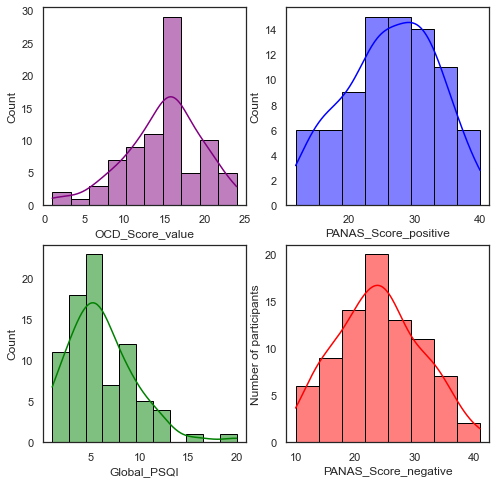

In [11]:
import seaborn as sns; sns.set(style="white", color_codes=True)
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
sns.set(style="white", color_codes=True)
sns.histplot(data=df, x="OCD_Score_value", color= 'purple',kde=True, edgecolor="black",ax=axs[0, 0])
sns.histplot(data=df, x="PANAS_Score_positive", color= 'blue',kde=True, edgecolor="black",ax=axs[0, 1])
sns.histplot(data=df, x="PANAS_Score_negative", color= 'red',kde=True, edgecolor="black",ax=axs[1, 1])
sns.histplot(data=df, x="Global_PSQI", color= 'green',kde=True, edgecolor="black",ax=axs[1, 0])
#plt.xlabel('OCD Score')
plt.ylabel('Number of participants')